In [4]:
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist as fashion_mnist


In [5]:
#Laddar in träningsdata och testdata där X är features och Y är targets
#När man laddar in på det här viset får man automatiskt en train_test_split. 
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [6]:
#Loopa igenom pixeldata
for item in X_train[:10]:
    print(item)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
#Vi kan visa att vi har en korrekt tränings/test split genom att kolla på formen av datan.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
#Utför tillplattningen av X-datan. 
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [9]:
#Här kan vi observera tillplattningen där vi ser att vi har gått från att ha bildens dimensioner 28x28 
#till att representeras som en enda rad, vilket blir produkten av de ursprungliga dimensionerna

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [10]:
#Skapar en dataframe för träningsdatan. Börjar med features - sen lägger vi til en kolumn "targets" för y-datan.
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

#Repetiion för test-datan
test_df = pd.DataFrame(X_test)
test_df['target'] = y_test

#'Concatinerar' båda dataframes till en stor. 
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Visa den gemensamma DataFrame
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Efternamn = Lagerqvist 
>Select out targets 4 to 7 if your last name starts with H to M.

In [11]:
#Arbetar vidare med de separata tränings och test dataframsen. 

 
#Filtrerar bort datan i både träning och test dfs som inte har targets mellan 4-7
train_df = train_df[(train_df['target'] >= 4) & (train_df['target'] <= 7)]

test_df = test_df[(test_df['target'] >= 4) & (test_df['target'] <= 7)]


print(train_df.shape)
print(test_df.shape)



(24000, 785)
(4000, 785)


In [12]:
#Stickprov för att se att vi fortsättningsvis arbetar med rätt targets.

print("Verifierar träningsdatan")
print(train_df['target'].head(10))

print("Verifierar testdatan")
print(test_df['target'].head(10))

Verifierar träningsdatan
6     7
8     5
9     5
12    5
13    5
14    7
18    6
19    4
22    4
24    4
Name: target, dtype: uint8
Verifierar testdatan
4     6
6     4
7     6
8     5
9     7
10    4
11    5
12    7
14    4
17    4
Name: target, dtype: uint8


#Task 2
a) Make a PCA plot of your training data, with datapoints colored by the target class.

In [13]:
from sklearn.decomposition import PCA

#Instansierar ett 2D PCA objekt 
pca = PCA(2)

#Vi använder här PCA objekten för att reducera dimensionerna i features.
#Notera att vi tar bort targets temporärt då vi enbart fokuserar på egenskaperna i datan (pixlarna)
pca_features = pca.fit_transform(train_df.drop('target', axis=1))

#Ordnar datan från PCA genom en egen dataframe där kolumnerna består av PCA 1 & 2
df_pca_features = pd.DataFrame(data=pca_features, columns=['PCA 1', 'PCA 2'])

#Lägger tillbaka 'target'-kolumnen från den ursprungliga dataframen
df_pca_features['target'] = train_df['target']

df_pca_features


,PCA 1,PCA 2,target
0,-1204.417174,747.012164,NaN
1,-1276.697271,-1098.189044,NaN
2,-560.655350,-756.961616,NaN
3,-1040.620047,99.817461,NaN
4,-1376.391691,20.350285,NaN
...,...,...,...
23995,1316.952302,-138.354635,7.0
23996,676.133344,-486.506697,7.0
23997,-1146.637771,375.181786,5.0
23998,-1370.932140,-723.046029,6.0


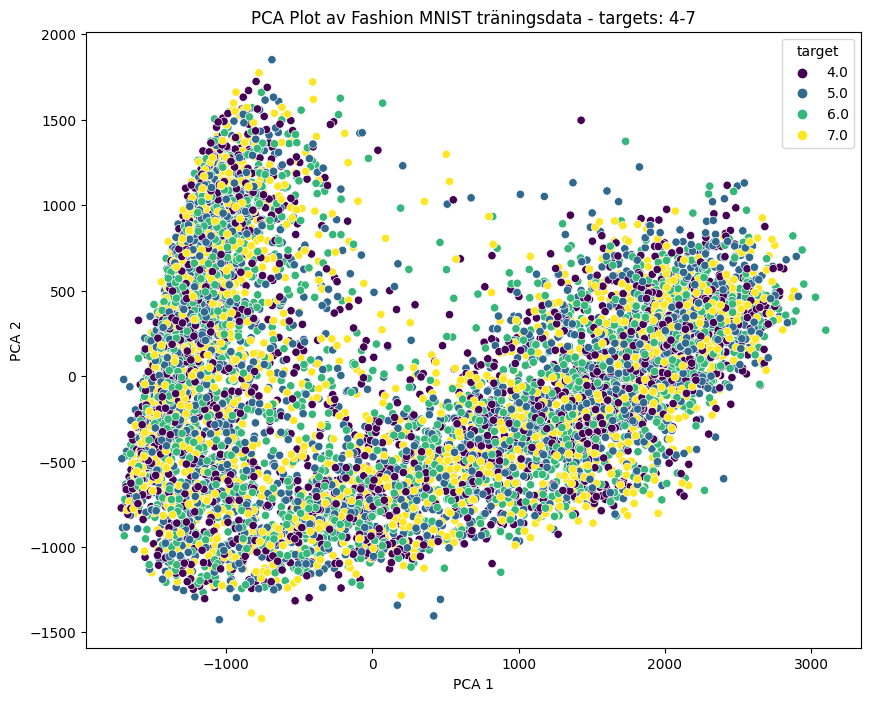

In [14]:
import seaborn as sns 
#För att möjliggöra färgkkodningen baserad på targets,använt genomgående under kursens gång.

#Storleken av plotten
plt.figure(figsize=(10, 8))

#Punkt/Spridningsdiagram: PCA 1 på X-axeln som innehåller mest information om variationen i datan. 
#Det är hue som möjliggör färgkodningen på targets och paletten väljer en uppsättning färger. 
#Fördelen mot matplotlib är att sns har fördefinerade färgpaletter.

sns.scatterplot(x='PCA 1', y='PCA 2', hue='target', data=df_pca_features, palette='viridis')
plt.title('PCA Plot av Fashion MNIST träningsdata - targets: 4-7')
plt.show()

Task 3
Make a Random Forest classification prediction on your Data and make a Confusion matrix of your
results.
What is your accuracy ? Discuss your results!

In [15]:
from sklearn.ensemble import RandomForestClassifier


# För att förbereda datan till en Random Forest tar vi ut datan från dataframen igen. 
# Nu får vi formen som vi hade i början av uppgiften men vi arbetar endast med targets 4-7
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Repeterar för testdatan
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

#Hyperparametrarna jag använder är 1000 träd samt ett randomseed för att säkerställa samma resultat. 
ran_for=RandomForestClassifier(n_estimators = 10, random_state = 42)

ran_for.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [16]:
#Efter vi tränat träningsdatan, testar vi nu vår modell på testdatan och sparar ner resultatet
test_prediction_array = ran_for.predict(X_test)
test_prediction_array

array([6, 4, 6, ..., 5, 6, 5], dtype=uint8)

In [17]:
y_test

4       6
6       4
7       6
8       5
9       7
       ..
9987    5
9989    4
9990    5
9991    6
9999    5
Name: target, Length: 4000, dtype: uint8

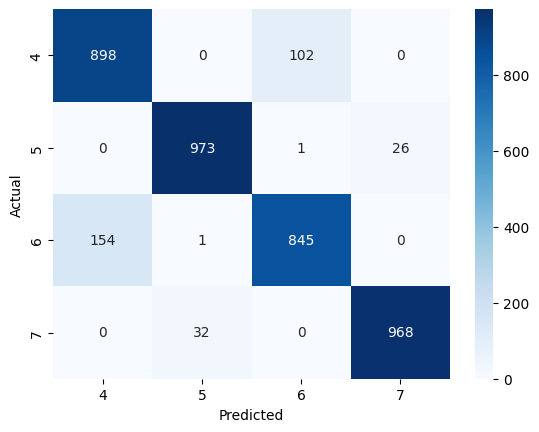

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vi gör en confusion matrix genom att ta de faktiska rätta target värdena och jämför med modellens output
confusion = confusion_matrix(y_test, test_prediction_array)

# Med hjälp av sns i kombination med matplotlib som vi även använde vid PCA plotten kan vi illustrera 
# confusion matrisen på ett bra sätt.
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[4, 5, 6, 7], yticklabels=[4, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Vi gör en classification report genom att ta de faktiska rätta target värdena och jämför med modellens output
report = classification_report(y_test, test_prediction_array)


print(report)

              precision    recall  f1-score   support

           4       0.85      0.90      0.88      1000
           5       0.97      0.97      0.97      1000
           6       0.89      0.84      0.87      1000
           7       0.97      0.97      0.97      1000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



Task 4
Repeat the above test 3, but use Logistic regression instead. Which one worked beter on your data ?

In [20]:
from sklearn.linear_model import LogisticRegression

# Likt uppgift 3 importerar vi vår ML modell.
# Istället för antalet träd anger vi max-iterations vilket anger hur många iterationer vi tillåter modellen -
# att optimera/justera för att anpassa sig till träningsdatan. 
logreg = LogisticRegression(max_iter=5000, random_state = 42)

# Vi kan direkt använda datan som vi förberedde för uppgift 3
logreg.fit(X_train, y_train)

# Vi kan sedan använda vår tränade modell mot testdatan.
pred_logArray = logreg.predict(X_test)
pred_logArray


/Users/alexanderlagerqvist/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6, 4, 6, ..., 5, 6, 5], dtype=uint8)

In [21]:
#Vi använder samma princip med importen vi tog in för klassificeringsrapporten tidigare och -- 
#tillämpar på logistic regression modellen.

report = classification_report(y_test, pred_logArray)

# Skriv ut rapporten


print(report)

              precision    recall  f1-score   support

           4       0.83      0.88      0.86      1000
           5       0.95      0.94      0.94      1000
           6       0.87      0.82      0.84      1000
           7       0.94      0.95      0.95      1000

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



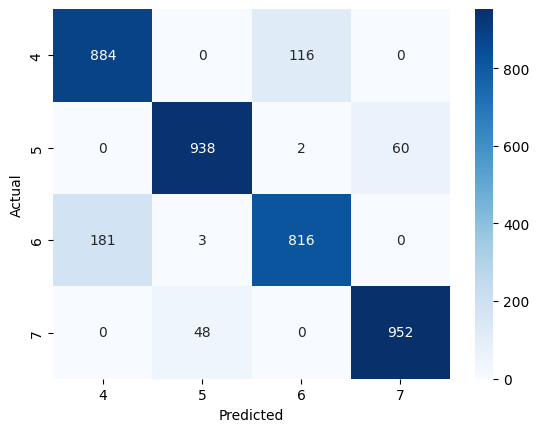

In [22]:
#Vi repeterar samma steg för att plotta confusion-matrisen som tidigare. 

confusion = confusion_matrix(y_test, pred_logArray)


sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[4, 5, 6, 7], yticklabels=[4, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalisera datan i förmån för logistic regression 
# Drar bort medelvärdet för varje feature. Centrerar datan runt 0.
#OBS Vi normaliserar inte targets, endast x-värden.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Efter normalisering tränar vi modellen som vanligt. 
logreg = LogisticRegression(max_iter=5000, random_state = 42)
logreg.fit(X_train, y_train)

pred_logArray = logreg.predict(X_test)


In [24]:
#Loopa igenom pixeldata
for item in X_train[:10]:
    print(item)

[-8.60827340e-03 -2.09570862e-02 -3.10785572e-02 -3.52429887e-02
 -5.27492128e-02 -6.34772032e-02 -8.85501981e-02 -1.41675178e-01
 -1.96001814e-01 -2.49624528e-01 -3.16514997e-01 -4.82169596e-01
 -6.66456955e-01 -6.72214668e-01 -6.66695702e-01 -6.82830268e-01
 -5.82465388e-01 -3.67203583e-01 -2.75965881e-01 -2.21495946e-01
 -1.68460647e-01 -1.20667196e-01 -9.61036939e-02 -8.04413535e-02
 -5.66969544e-02 -3.42915045e-02 -2.01028710e-02 -9.18171177e-03
 -1.79738017e-02 -3.01836294e-02 -2.87852004e-02 -5.17883264e-02
 -7.47958266e-02 -1.16184226e-01 -2.00294078e-01 -2.71662336e-01
 -3.34277093e-01 -4.21656534e-01 -5.60055815e-01 -7.66235677e-01
 -8.73103708e-01 -8.65377257e-01 -8.60982424e-01 -8.78507193e-01
 -8.36993677e-01 -6.42873039e-01 -4.78508053e-01 -3.76421632e-01
 -3.12382238e-01 -2.48455910e-01 -1.81767727e-01 -1.35169938e-01
 -9.76916485e-02 -6.00447055e-02 -3.26586050e-02 -1.65565092e-02
 -1.69649236e-02 -1.94200792e-02 -3.86665488e-02 -6.35734115e-02
 -1.09663699e-01 -1.94985

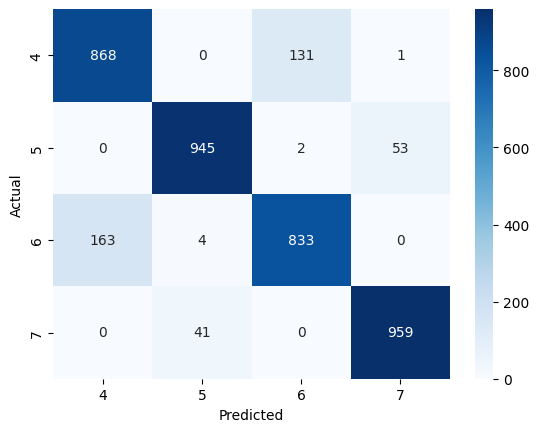

In [25]:
#Vi repeterar samma steg för att plotta confusion-matrisen som tidigare. 

confusion = confusion_matrix(y_test, pred_logArray)


sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[4, 5, 6, 7], yticklabels=[4, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
from sklearn.metrics import classification_report


report = classification_report(y_test, pred_logArray)

# Skriv ut rapporten


print(report)

              precision    recall  f1-score   support

           4       0.84      0.87      0.85      1000
           5       0.95      0.94      0.95      1000
           6       0.86      0.83      0.85      1000
           7       0.95      0.96      0.95      1000

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [27]:
#Förbereda NN - Skapa validderingset 

print("Form innan valideringssplit:")
print(f"X train: {X_train.shape}")
print(f"Y train: {y_train.shape}")

# 20% av träningsdatan är lika med 0.2 * 24000 = 4800. 
# Validerings setet kommer ta 4800 från träningsdatan.
val_size = int(0.2 * len(X_train))

print(f"Valideringsstorlek: {val_size} ")


X_val = X_train[:val_size]
y_val = y_train[:val_size]

X_train = X_train[val_size:]
y_train = y_train[val_size:]

print("Form efter valideringssplit:")
print(f"X train: {X_train.shape}")
print(f"Y train: {y_train.shape}")

print("Form på valideringset:")
print(f"X val: {X_val.shape}")
print(f"Y val: {y_val.shape}")

Form innan valideringssplit:
X train: (24000, 784)
Y train: (24000,)
Valideringsstorlek: 4800 
Form efter valideringssplit:
X train: (19200, 784)
Y train: (19200,)
Form på valideringset:
X val: (4800, 784)
Y val: (4800,)


In [28]:
#Importerar keras och lagermoduler för att kunna skapa ett basic NN
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout


In [29]:
# Eftersom att vi redan normaliserat datan när vi körde logistic regression kan vi ...
# mata in input shapen som den är utan att behöva flatta 28x28

model = Sequential()
model.add(Dense(100, input_shape=(784,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0,3))
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0,2))
model.add(Dense(2000, activation = "relu"))
model.add(Dropout(0,2))
model.add(Dense(3200, activation = "relu"))
model.add(Dropout(0,2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 512)               51712     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 2000)              2050000   
                                                                 
 dropout_2 (Dropout)         (None, 2000)              0

In [30]:
#Denna del sätter samman det neurala nätverk innan träningen utförs. Dvs. en del av våra hyperparametrar 

#lossfunktionen fungerar bra när vi har flera klasser och ettiketterna (target värden) är heltal (4,5,6,7)
#optimizer dikterar hur modellen ska anpassa inlärningsförmågan (gradient decent). Finns andra tex. Adam
#accuracy är det mått vi använder för att utvärdera hur väl modellen klassificerar

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [31]:
#Här tränar vi nätverket på träningsdatan samt valideringsdatan. 
#Epochs och ev. batchsize är hyperparametrar vi kan konfigruera för att exempelvis:
# diktera hur många gånger/tid vi ger nätverket att träna på datan. 
# batchsize kan stycka upp träningsdatan i mindre delar för varja träningsrunda (epoch)

history=model.fit(X_train, y_train, epochs=50, batch_size =32, validation_data=(X_val,y_val))

Epoch 1/50
600/600 [==============================] - 20s 32ms/step - loss: 0.2876 - accuracy: 0.8920 - val_loss: 0.1943 - val_accuracy: 0.9271
Epoch 2/50
600/600 [==============================] - 17s 28ms/step - loss: 0.2075 - accuracy: 0.9240 - val_loss: 0.1888 - val_accuracy: 0.9348
Epoch 3/50
600/600 [==============================] - 16s 27ms/step - loss: 0.1716 - accuracy: 0.9362 - val_loss: 0.1478 - val_accuracy: 0.9442
Epoch 4/50
600/600 [==============================] - 16s 26ms/step - loss: 0.1412 - accuracy: 0.9460 - val_loss: 0.1643 - val_accuracy: 0.9425
Epoch 5/50
600/600 [==============================] - 15s 25ms/step - loss: 0.1306 - accuracy: 0.9503 - val_loss: 0.1726 - val_accuracy: 0.9404
Epoch 6/50
600/600 [==============================] - 15s 25ms/step - loss: 0.1222 - accuracy: 0.9540 - val_loss: 0.1932 - val_accuracy: 0.9396
Epoch 7/50
600/600 [==============================] - 15s 25ms/step - loss: 0.1262 - accuracy: 0.9528 - val_loss: 0.1660 - val_accuracy:

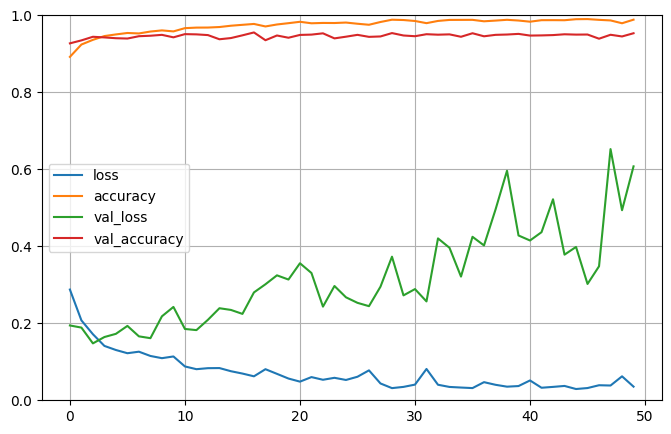

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

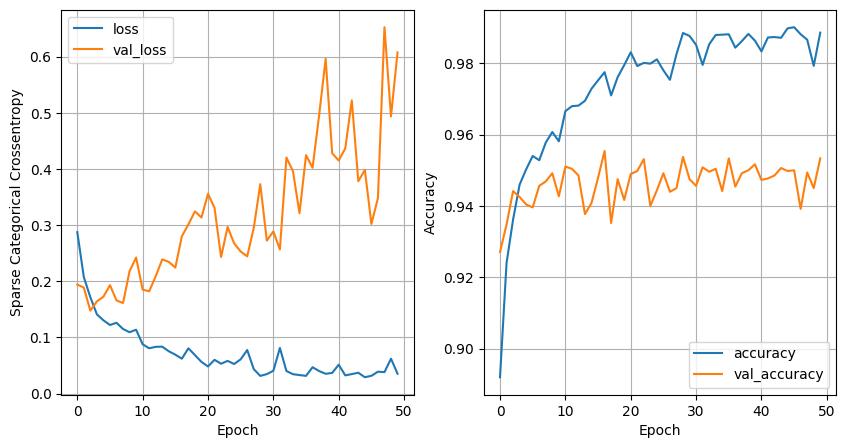

In [33]:
#Utvärdera träningsdata och valideringsdata

#Unyttjar endast matplotlib här med att deklarera en subplot vilket ger två plots brevid varandra.
#Datan för plotten tar vi från history som har sparad information från modellen. 
#Vi kan därmed tilldela x & y axeln loss och validerings loss respektive accuracy.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(history.history['loss'], label = 'loss')
ax1.plot(history.history['val_loss'], label = 'val_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Sparse Categorical Crossentropy')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['accuracy'], label = 'accuracy')
ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
plt.show()

In [34]:
model.evaluate(X_test,y_test) 

125/125 [==============================] - 1s 7ms/step - loss: 0.8773 - accuracy: 0.9450


[0.8772757649421692, 0.9449999928474426]

In [35]:
#Klassificerings rapport


y_pred_sannolikheter = model.predict(X_test)

# Konvertera från sannolikheter till klassettiketter
y_pred = np.argmax(y_pred_sannolikheter, axis=1)

# Skapa rapporten som vi tidigare gjort. 
rapport = classification_report(y_test, y_pred)

# Skriv ut rapporten
print(rapport)


125/125 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           4       0.90      0.92      0.91      1000
           5       0.98      0.98      0.98      1000
           6       0.92      0.90      0.91      1000
           7       0.98      0.98      0.98      1000

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



In [36]:
y_pred_sannolikheter = model.predict(X_test)

125/125 [==============================] - 1s 7ms/step


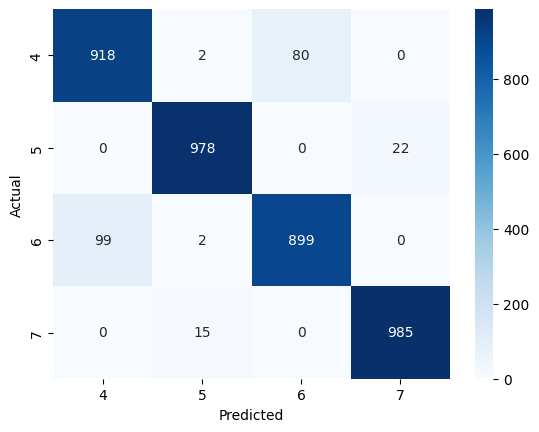

In [37]:
#Illustrerar en confusion matrix som vi gjort tidigare 

# Skapa en förvirringsmatris med verkliga och förutsägda etiketter
confusion = confusion_matrix(y_test, y_pred)

# Skapa en värmekarta för förvirringsmatrisen
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[4, 5, 6, 7], yticklabels=[4, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
